In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare


# Load data
# # data = np.loadtxt('data.txt', delimiter=',')
# obs1 = np.array([17,9,11,14,26,21,23,23,27,16,27,38,20,30,27,34,35,36,35,31])
# obs2 = np.array([19,11,12,7,28,32,33,34,26,19,19,26,27,29,24,34,35,31,31,23])
# expected = np.linspace(13.125,36.875,20)

time = np.arange(0,20, 2)
obs = np.array([30, 15, 11, 9, 3, 1, 2, 1, 2, 1])





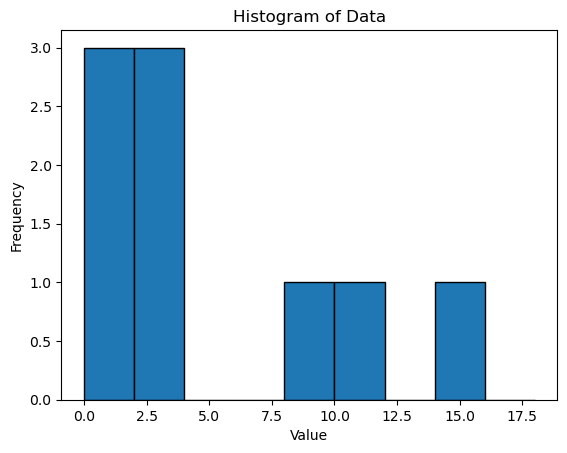

In [13]:
# Making histogram with binwidth of 2
bins = np.arange(0,20,2)
plt.hist(obs, bins=bins, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Data')
plt.show()


In [31]:
# Making exponential fit functions
def normalized_exp(time, p1, p2):
    return p1 * (1 - np.exp(-2 * p2) * np.exp(-p2 * time))


def exponential(time, p1, p2):
    return p1 * np.exp(-p2 * time)

C:\Users\barit\AppData\Local\Temp\ipykernel_2652\207329419.py:7: RuntimeWarning: overflow encountered in exp
  return p1 * np.exp(-p2 * time)


[29.04822858  0.25250523]
[[2.15775196e+00 1.73616565e-02]
 [1.73616565e-02 5.22047881e-04]]
[1.46892885 0.02284837]


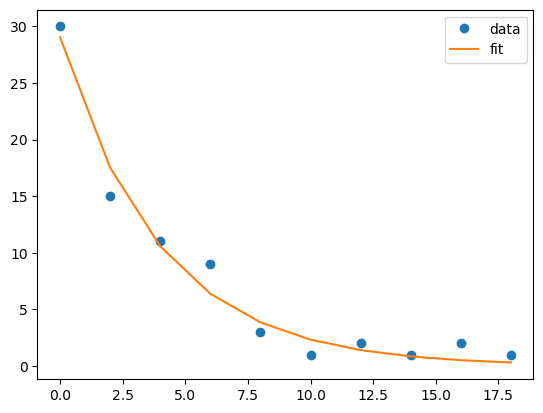

In [32]:
# Doing the fit
from scipy.optimize import curve_fit
popt, pcov = curve_fit(exponential, time, obs)
print(popt)
print(pcov)
print(np.sqrt(np.diag(pcov)))

# Plotting the fit
plt.plot(time, obs, 'o', label='data')
plt.plot(time, exponential(time, *popt), label='fit')
plt.legend()
plt.show()


c:\Users\barit\anaconda3\envs\AdvancedDataAnalysis\Lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[  7.50000005 104.6156811 ]
[[inf inf]
 [inf inf]]
[inf inf]


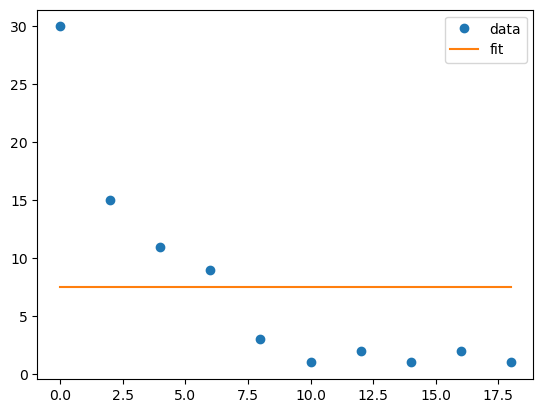

In [68]:
# Doing the fit for the normalized function
popt, pcov = curve_fit(normalized_exp, time, obs)
print(popt)
print(pcov)
print(np.sqrt(np.diag(pcov)))

# Plotting the fit
plt.plot(time, obs, 'o', label='data')
plt.plot(time, normalized_exp(time, *popt), label='fit')
plt.legend()
plt.show()


In [ ]:
# Using linear algebra approch with chi^2
def chi_squared(obs, expected):
    return np.sum((obs - expected)**2 / expected)



[0.4        0.2        0.14666667 0.12       0.04       0.01333333
 0.02666667 0.01333333 0.02666667 0.01333333]
[ 0.1        23.62079764]
[[inf inf]
 [inf inf]]
[inf inf]


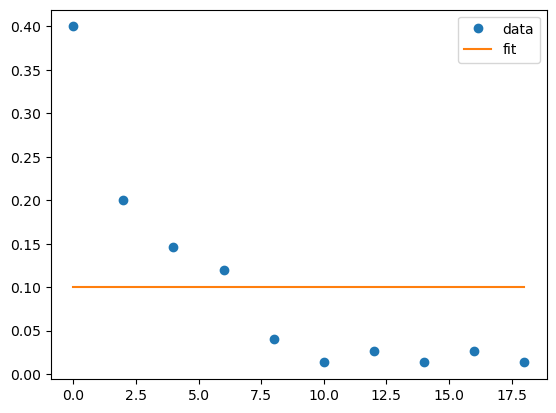

In [69]:
# Normalizing the data
norm_obs = obs / np.sum(obs)
print(norm_obs)

# Doing the fit for the normalized function
popt, pcov = curve_fit(normalized_exp, time, norm_obs)
print(popt)
print(pcov)
print(np.sqrt(np.diag(pcov)))


# Plotting the fit
plt.plot(time, norm_obs, 'o', label='data')
plt.plot(time, normalized_exp(time, *popt), label='fit')
plt.legend()
plt.show()

